In [37]:

# 1. Tambah path agar bisa akses folder scripts/
import sys
sys.path.append('../scripts/')



# 2. Import fungsi dari scripts
from preprocesing import load_dataset, make_target, drop_useless_columns, encode_and_scale
from modelling import train_logreg, train_rf, evaluate_model, save_model

# 3. Load & proses data
df = load_dataset('../data/loan_data_2007_2014.csv')
df = make_target(df)
df = drop_useless_columns(df)
df = encode_and_scale(df)

# 4. Split data
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train & evaluate
# rf = train_rf(X_train, y_train)
# evaluate_model(rf, X_test, y_test)
# save_model(rf, '../output/model_rf.pkl')

logreg = train_logreg(X_train, y_train)
evaluate_model(logreg, X_test, y_test)
save_model(logreg, '../outputs/model_logreg.pkl')


e:\Learn\Intrenship Based Project\Final Task\credit-risk-prediction\notebooks\../scripts\preprocesing.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

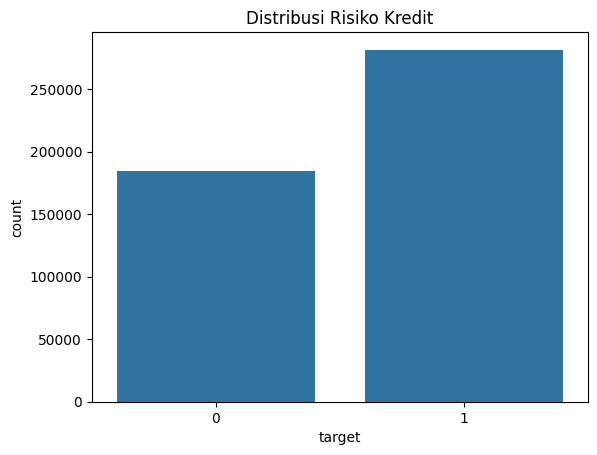

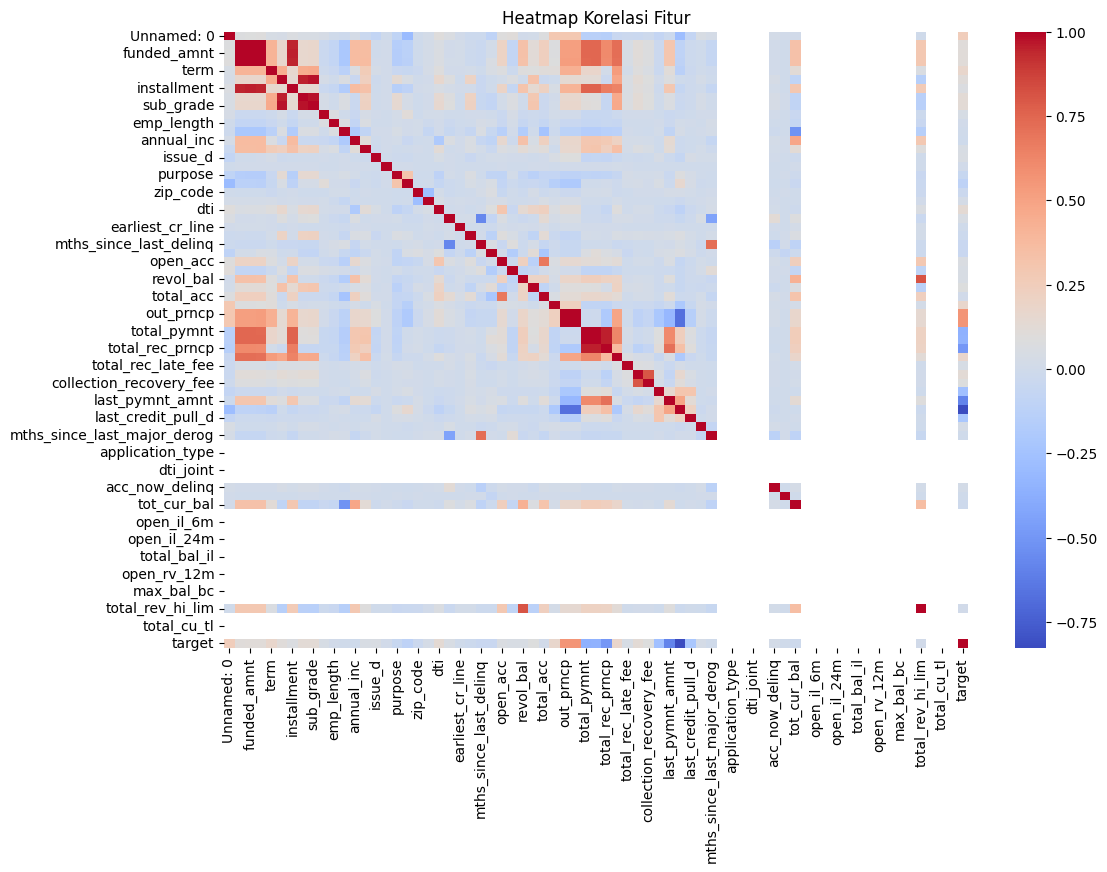

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi target (good vs bad)
sns.countplot(x='target', data=df)
plt.title("Distribusi Risiko Kredit")
plt.show()

# Korelasi numerik
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap Korelasi Fitur")
plt.show()


Simpan Visualisasi ROC Curve

In [9]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.savefig("../outputs/roc_curve_logreg.png")
plt.show()


NameError: name 'logreg' is not defined